In [1]:
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

#set matplotlib width and height    
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
# load csv
def load_csv():
    df = pd.read_csv('data/S_seaice_extent_daily_v3.0.csv', header=0, skiprows=[1], parse_dates=[[0,1,2]], sep=',', engine='python', quotechar='"', skipinitialspace=True)
    df = df.rename(columns={'Year_Month_Day': 'Date'})
    df['doy'] = df['Date'].dt.dayofyear
    df['year'] = df['Date'].dt.year
    df = df.set_index('Date')
    df = df.drop(['Missing', 'Source Data'], axis=1)    
    return df


In [59]:
def display(df):
    fig = plt.subplots()
    plt.plot(df)


In [3]:
src_df = load_csv()
src_df

,Extent,doy,year
Date,,,
1978-10-26,17.624,299,1978
1978-10-28,17.803,301,1978
1978-10-30,17.670,303,1978
1978-11-01,17.527,305,1978
1978-11-03,17.486,307,1978
...,...,...,...
2023-06-20,11.357,171,2023
2023-06-21,11.488,172,2023
2023-06-22,11.536,173,2023


In [20]:
df = src_df.copy()


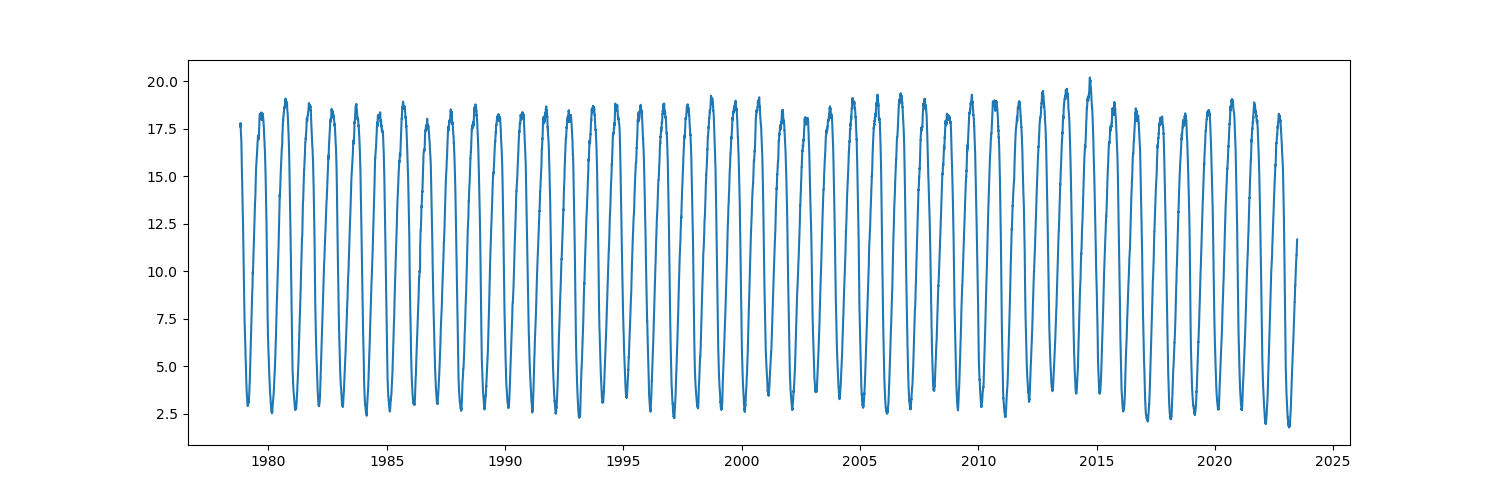

In [24]:
df['Extent'].plot()

fig = plt.figure()
plt.plot(df['Extent']);

In [26]:
# reproduce https://twitter.com/EliotJacobson analysis


df = df.loc[df['year']>=1991]


df['mean']= df['Extent'].mean()
df['anomaly'] = df['Extent'] - df['mean']
df

,Extent,doy,year,mean,anomaly
Date,,,,,
1991-01-01,7.095,1,1991,11.573032,-4.478032
1991-01-02,6.928,2,1991,11.573032,-4.645032
1991-01-03,6.795,3,1991,11.573032,-4.778032
1991-01-04,6.684,4,1991,11.573032,-4.889032
1991-01-05,6.519,5,1991,11.573032,-5.054032
...,...,...,...,...,...
2023-06-20,11.357,171,2023,11.573032,-0.216032
2023-06-21,11.488,172,2023,11.573032,-0.085032
2023-06-22,11.536,173,2023,11.573032,-0.037032


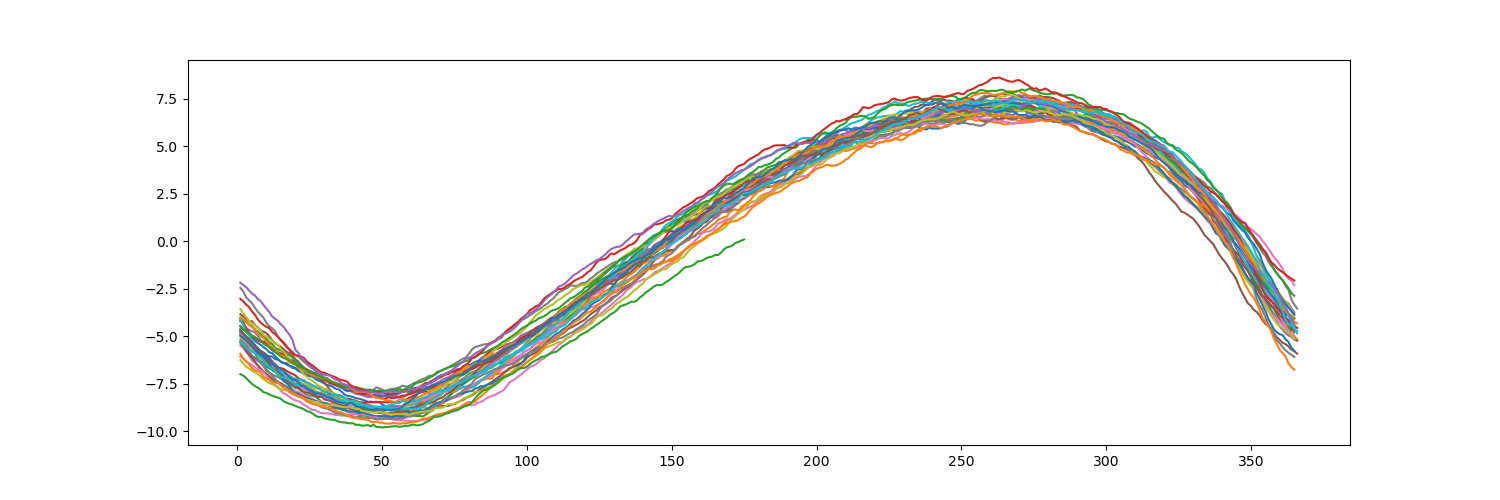

In [34]:
df_ano = df.set_index(['year', 'doy'])['anomaly'].unstack('year')

fig = plt.subplots()
plt.plot(df_ano);



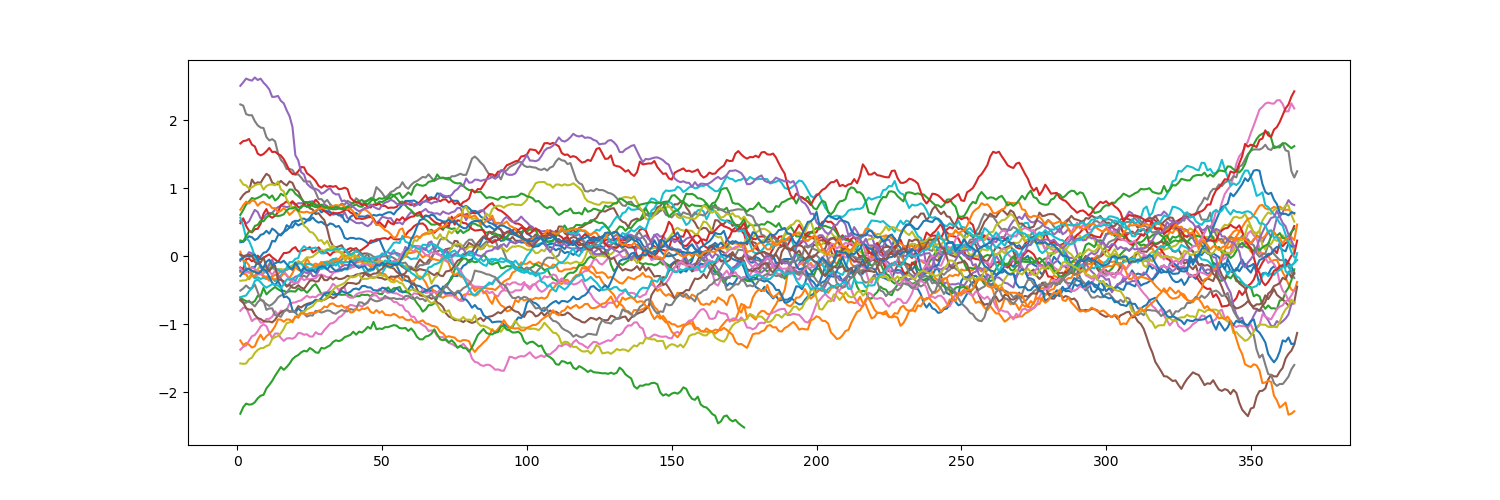

In [61]:
df_x = df.groupby('doy')['anomaly'].mean()

df_x
df_y = df.set_index(['year', 'doy'])['anomaly'].unstack('year')
df_y = df_y.sub(df_x, axis=0)

display(df_y);